In [4]:
import os
import requests
import os
import requests
from tqdm import tqdm

# download pdf
pdf_path = "./pdf_file/Effective-Python.pdf"

# create folder if it doesn't exist
folder_path = os.path.dirname(pdf_path)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# download pdf
if not os.path.exists(pdf_path):
    print(" [INFO] File not found, downloading...")

    # url of the pdf
    file_id = "1uMDv_hYh6AuNNtX0oRaUNkG4on-XT8SH"
    url = f"https://drive.google.com/uc?id={file_id}"
    response = requests.get(url, stream=True)
    
    file_name = pdf_path

    # check if the request was successful
    if response.status_code == 200:
        total_size = int(response.headers.get('content-length', 0))
        block_size = 1024  # 1 KB
        progress_bar = tqdm(total=total_size, unit='iB', unit_scale=True)

        with open(file_name, "wb") as file:
            for data in response.iter_content(block_size):
                progress_bar.update(len(data))
                file.write(data)
        
        progress_bar.close()
        print(f"[INFO] File downloaded successfully saved as {file_name}")
    else:
        print(f"[INFO] Failed to download file, status code: {response.status_code}")
else:
    print(f"[INFO] File already exists, skipping download")


[INFO] File already exists, skipping download


In [9]:
import fitz  # PyMuPDF
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    text = text.replace("\n", " ").strip()
    # text = text.replace("\x0c", "")
    return text

def open_and_read_pdf(pdf_path: str) -> str:
    doc = fitz.open(pdf_path)
    pages_and_text = []
    for page_num, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_text.append({
            "page_num": page_num - 24,
            "page_char_count": len(text),
            "page_word_count": len(text.split(" ")),
            "page_setence_count": len(text.split(".")),
            "page_token_count": len(text)/4,
            "text": text
        })
    return pages_and_text

pages_and_text = open_and_read_pdf(pdf_path=pdf_path)
pages_and_text[:2]

0it [00:00, ?it/s]

MuPDF error: library error: zlib error: incorrect header check

MuPDF error: format error: cmsOpenProfileFromMem failed



469it [00:00, 787.10it/s]


[{'page_num': -24,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_setence_count': 1,
  'page_token_count': 0.0,
  'text': ''},
 {'page_num': -23,
  'page_char_count': 3111,
  'page_word_count': 522,
  'page_setence_count': 27,
  'page_token_count': 777.75,
  'text': 'Praise for Effective Python “I have been recommending this book enthusiastically since the first edition  appeared in 2015. This new edition, updated and expanded for Python 3, is a  treasure trove of practical Python programming wisdom that can benefit pro- grammers of all experience levels.” —Wes McKinney, Creator of Python Pandas project, Director of Ursa Labs “If you’re coming from another language, this is your definitive guide to taking  full advantage of the unique features Python has to offer. I’ve been working with  Python for nearly twenty years and I still learned a bunch of useful tricks, espe- cially around newer features introduced by Python 3. Effective Python is crammed  with actionable advice, and

In [10]:
import random

random.sample(pages_and_text, k=3)

[{'page_num': 425,
  'page_char_count': 1520,
  'page_word_count': 289,
  'page_setence_count': 19,
  'page_token_count': 380.0,
  'text': 'Parameter and variable type annotations are delineated with a colon  (such as name: type). Return value types are specified with -> type  following the argument list. Using such type annotations and mypy,  I can easily spot the bug: def subtract(a: int, b: int) -> int:  # Function annotation     return a - b   subtract(10, \'5\')  # Oops: passed string value $ python3 -m mypy --strict example.py .../example.py:4: error: Argument 2 to "subtract" has  incompatible type "str"; expected "int" Another common mistake, especially for programmers who have  recently moved from Python 2 to Python 3, is mixing bytes and str  instances together (see Item 3: “Know the Differences Between bytes  and str”). Do you see the problem in this example that causes a run- time error? def concat(a, b):     return a + b   concat(\'first\', b\'second\') >>> Traceback ... Ty

In [11]:
import pandas as pd

df = pd.DataFrame(pages_and_text)
df.head()

,page_num,page_char_count,page_word_count,page_setence_count,page_token_count,text
0,-24,0,1,1,0.00,
1,-23,3111,522,27,777.75,Praise for Effective Python “I have been recom...
2,-22,825,135,8,206.25,“This is a great book for both novice and expe...
3,-21,31,4,1,7.75,Effective Python Second Edition
4,-20,34,5,1,8.50,This page intentionally left blank


In [12]:
df.describe().round(2)

,page_num,page_char_count,page_word_count,page_setence_count,page_token_count
count,469.00,469.00,469.00,469.00,469.00
mean,210.00,1609.13,305.98,15.61,402.28
std,135.53,440.60,86.72,7.10,110.15
min,-24.00,0.00,1.00,1.00,0.00
25%,93.00,1444.00,273.00,11.00,361.00
50%,210.00,1650.00,315.00,16.00,412.50
75%,327.00,1862.00,354.00,20.00,465.50
max,444.00,3111.00,540.00,49.00,777.75


In [13]:
from spacy.lang.en import English

nlp = English()

# Add a sentencizer pipeline
nlp.add_pipe("sentencizer")

# Create documnet instance as an example    
doc = nlp("This is a sentence. This is another sentence. This is the last sentence.")
assert len(list(doc.sents)) == 3

# Print out our sentences splits
list(doc.sents)


[This is a sentence., This is another sentence., This is the last sentence.]

In [14]:
pages_and_text[20]

{'page_num': -4,
 'page_char_count': 1364,
 'page_word_count': 253,
 'page_setence_count': 16,
 'page_token_count': 341.0,
 'text': 'xxii  Acknowledgments Greg Stein, and Ka-Ping Yee. I appreciate your tutelage and leader- ship. Python has an excellent community, and I feel lucky to be a part  of it. Thanks to my teammates over the years for letting me be the worst  player in the band. Thanks to Kevin Gibbs for helping me take risks.  Thanks to Ken Ashcraft, Ryan Barrett, and Jon McAlister for showing  me how it’s done. Thanks to Brad Fitzpatrick for taking it to the next  level. Thanks to Paul McDonald for being an amazing co-founder.  Thanks to Jeremy Ginsberg, Jack Hebert, John Skidgel, Evan   Martin,  Tony Chang, Troy Trimble, Tessa Pupius, and Dylan Lorimer for help- ing me learn. Thanks to Sagnik Nandy and Waleed Ojeil for your  mentorship. Thanks to the inspiring programming and engineering teachers  that I’ve had: Ben Chelf, Glenn Cowan, Vince Hugo, Russ Lewin, Jon  Stemmle, De

In [67]:
for item in tqdm(pages_and_text):
    item["sentencizer"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings (the default type is spaCy datatype)
    item["sentencizer"] = [str(sent) for sent in item["sentencizer"]]
    
    # Count the sentences
    item["sentencizer_count"] = len(item["sentencizer"])

100%|██████████| 469/469 [00:01<00:00, 410.34it/s]


In [68]:
random.sample(pages_and_text, k=1)

[{'page_num': 416,
  'page_char_count': 1624,
  'page_word_count': 236,
  'page_setence_count': 19,
  'page_token_count': 406.0,
  'text': "408  Chapter 10 Collaboration Note When your deployment environment configuration gets really complicated,  you should consider moving it out of Python constants (like TESTING) and into  dedicated configuration files. Tools like the configparser built-in module let  you maintain production configurations separately from code, a distinction  that’s crucial for collaborating with an operations team. This approach can be used for more than working around external  assumptions. For example, if I know that my program must work dif- ferently depending on its host platform, I can inspect the sys module  before defining top-level constructs in a module: # db_connection.py import sys   class Win32Database:     ...   class PosixDatabase:     ...   if sys.platform.startswith('win32'):     Database = Win32Database else:     Database = PosixDatabase Similarly, 

In [69]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_num,page_char_count,page_word_count,page_setence_count,page_token_count,sentencizer_count
count,469.00,469.00,469.00,469.00,469.00,469.00
mean,220.00,1609.13,233.85,15.61,402.28,7.69
std,135.53,440.60,73.61,7.10,110.15,4.66
min,-14.00,0.00,0.00,1.00,0.00,0.00
25%,103.00,1444.00,197.00,11.00,361.00,4.00
50%,220.00,1650.00,236.00,16.00,412.50,7.00
75%,337.00,1862.00,281.00,20.00,465.50,11.00
max,454.00,3111.00,492.00,49.00,777.75,30.00


In [70]:
# Define split size to turn group of sentences into chunks
num_sentences_per_chunk = 10

# Create a function to split lists of texts recursively into chunks size
def split_list_of_texts_into_chunks(input_list: 'list[str]',
                                    slice_size: int=num_sentences_per_chunk) -> 'list[list[str]]':
    return [input_list[i:i + slice_size] for i in range(0, len(input_list), slice_size)]

test_list = list(range(25))
split_list_of_texts_into_chunks(input_list=test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [71]:
# Loop through all the sentences and split them into chunks
for item in tqdm(pages_and_text):
    item["sentencizer_chunks"] = split_list_of_texts_into_chunks(input_list=item["sentencizer"],
                                                                 slice_size=num_sentences_per_chunk)

    # Count the chunks
    item["sentencizer_chunks_count"] = len(item["sentencizer_chunks"])

100%|██████████| 469/469 [00:00<00:00, 482021.21it/s]


In [72]:
random.sample(pages_and_text, k=1)

[{'page_num': 234,
  'page_char_count': 1997,
  'page_word_count': 304,
  'page_setence_count': 24,
  'page_token_count': 499.25,
  'text': "226  Chapter 7 Concurrency and Parallelism Item 52: Use subprocess to Manage Child Processes Python has battle-hardened libraries for running and managing child  processes. This makes it a great language for gluing together other  tools, such as command-line utilities. When existing shell scripts get  complicated, as they often do over time, graduating them to a rewrite  in Python for the sake of readability and maintainability is a natural  choice. Child processes started by Python are able to run in parallel, enabling  you to use Python to consume all of the CPU cores of a machine and  maximize the throughput of programs. Although Python itself may  be CPU bound (see Item 53: “Use Threads for Blocking I/O, Avoid for  Parallelism”), it’s easy to use Python to drive and coordinate CPU-  intensive workloads. Python has many ways to run subprocesses

In [73]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_num,page_char_count,page_word_count,page_setence_count,page_token_count,sentencizer_count,sentencizer_chunks_count
count,469.00,469.00,469.00,469.00,469.00,469.00,469.00
mean,220.00,1609.13,233.85,15.61,402.28,7.69,1.26
std,135.53,440.60,73.61,7.10,110.15,4.66,0.46
min,-14.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,103.00,1444.00,197.00,11.00,361.00,4.00,1.00
50%,220.00,1650.00,236.00,16.00,412.50,7.00,1.00
75%,337.00,1862.00,281.00,20.00,465.50,11.00,2.00
max,454.00,3111.00,492.00,49.00,777.75,30.00,3.00


In [74]:
import re

# Split each chunk into its own item
pages_and_chunk = []
for item in tqdm(pages_and_text):
    for sentence_chunk in item["sentencizer_chunks"]:
        chunk_dict = {}
        chunk_dict["page_num"] = item["page_num"]

        # Join the sentences together into a paragraph-Like structure, aka join the list of sentences into one paragragh
        joined_sentence_chunk = "".join(sentence_chunk).replace(" ", " ").strip()
        joined_sentence_chunk = re.sub(r"\.([A-Z])", r". \1 ", joined_sentence_chunk)
    
        chunk_dict["sentence_chunk"] = joined_sentence_chunk      

        # Get some stats on our chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4

        pages_and_chunk.append(chunk_dict)

len(pages_and_chunk)

100%|██████████| 469/469 [00:00<00:00, 28790.34it/s]


592

In [75]:
random.sample(pages_and_chunk, k=1)

[{'page_num': 326,
  'sentence_chunk': "318  Chapter 8 Robustness and Performance Here, I rename the GameState class to BetterGameState and remove  the old class from the program entirely: class BetterGameState:     def __init__(self, level=0, points=0, magic=5):         self.level = level         self.points = points         self.magic = magic Attempting to deserialize an old GameState object now fails because  the class can’t be found: pickle.loads(serialized) >>> Traceback ... AttributeError: Can't get attribute 'GameState' on <module  ¯'__main__' from 'my_code.py'> The cause of this exception is that the import path of the serialized  object’s class is encoded in the pickled data: print(serialized) >>> b'\\x80\\x04\\x95A\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x8c\\x08__main__ ¯\\x94\\x8c\\tGameState\\x94\\x93\\x94)\\x81\\x94}\\x94(\\x8c\\x05level ¯\\x94K\\x00\\x8c\\x06points\\x94K\\x00\\x8c\\x05magic\\x94K\\x05ub.'The solution is to use copyreg again. I  can specify a stable identifie

In [76]:
df = pd.DataFrame(pages_and_chunk)
df.describe().round(2)

,page_num,chunk_char_count,chunk_word_count,chunk_token_count
count,592.00,592.00,592.00,592.00
mean,216.67,1277.55,245.37,319.39
std,136.90,538.06,109.58,134.52
min,-13.00,13.00,3.00,3.25
25%,94.00,970.00,179.00,242.50
50%,218.50,1451.50,271.00,362.88
75%,333.25,1660.25,320.00,415.06
max,452.00,2274.00,528.00,568.50


In [77]:
df.head()

,page_num,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-13,Praise for Effective Python “I have been recom...,1966,338,491.50
1,-13,Early sections lay out an enormous list of ti...,1151,191,287.75
2,-12,“This is a great book for both novice and expe...,828,138,207.00
3,-11,Effective Python Second Edition,31,4,7.75
4,-10,This page intentionally left blank,34,5,8.50


In [78]:
# Show random chunks with under 30 tokens in length
min_token_count = 30
for row in df[df["chunk_token_count"] <= min_token_count].sample(3).iterrows():
    print(f"Chunk token count: {row[1]['chunk_token_count']} | Text: {row[1]['sentence_chunk']}")

Chunk token count: 8.5 | Text: This page intentionally left blank
Chunk token count: 11.25 | Text: The potential for confusion is even worse for
Chunk token count: 11.25 | Text: This can be especially helpful when debugging


In [79]:
# Filter out chunks with less than 30 tokens
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_count].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_num': -13,
  'sentence_chunk': 'Praise for Effective Python “I have been recommending this book enthusiastically since the first edition  appeared in 2015. T his new edition, updated and expanded for Python 3, is a  treasure trove of practical Python programming wisdom that can benefit pro- grammers of all experience levels.” —Wes McKinney, Creator of Python Pandas project, Director of Ursa Labs “If you’re coming from another language, this is your definitive guide to taking  full advantage of the unique features Python has to offer. I ’ve been working with  Python for nearly twenty years and I still learned a bunch of useful tricks, espe- cially around newer features introduced by Python 3. E ffective Python is crammed  with actionable advice, and really helps define what our community means when  they talk about Pythonic code.” —Simon Willison, Co-creator of Django “I’ve been programming in Python for years and thought I knew it pretty well. Thanks to this treasure trove of t

In [80]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_num': 21,
  'sentence_chunk': "Item 4: Prefer Interpolated F-Strings  13 Now, I make a few modifications to the values that I’m formatting  to make the printed message more useful. T his causes the tuple in  the formatting expression to become so long that it needs to be split  across multiple lines, which hurts readability: for i, (item, count) in enumerate(pantry):     print('#%d: %-10s = %d' % (         i + 1,         item.title(),         round(count))) >>> #1: Avocados   = 1 #2: Bananas    = 2 #3: Cherries   = 15 The third problem with formatting expressions is that if you want  to use the same value in a format string multiple times, you have to  repeat it in the right side tuple: template = '%s loves food. S ee %s cook.'name = 'Max' formatted = template % (name, name) print(formatted) >>> Max loves food. S ee Max cook. T his is especially annoying and error prone if you have to repeat  small modifications to the values being formatted. F or example, here  I remembered to

In [81]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2', 
                                      device='cuda')

# Create a list of sentences
sentences = ["The Sentences Transformer library provides an easy way to create embeddings",
             "Sentences can be embedded one by one or in a list",
             "I like a loli!"]


# Sentence are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embedding_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embedding in embedding_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")
    print("")

Sentence: The Sentences Transformer library provides an easy way to create embeddings
Embedding: [-5.28019965e-01  2.76935875e-01  1.66682646e-01 -4.99300838e-01
 -4.50595230e-01  1.02246605e-01 -1.69473886e-01 -4.22899872e-01
 -9.89056900e-02  2.73091704e-01 -2.73043871e-01  1.58215359e-01
  5.06154001e-01  3.94771434e-02  1.14398256e-01  6.83269858e-01
 -1.21926703e-01  9.51975405e-01 -3.71360451e-01 -3.39380056e-01
  5.98491907e-01  6.77275583e-02 -9.10788849e-02 -3.96213144e-01
  4.23162639e-01  2.42336020e-01 -9.80029926e-02 -2.64273047e-01
  4.78841007e-01 -3.74096751e-01  2.12306872e-01  1.01060286e-01
  1.62076149e-02  2.82214195e-01 -3.17239702e-01  2.11349845e-01
 -9.52580571e-03  4.93187457e-01  7.81966373e-02 -4.38499331e-01
 -6.20878816e-01  2.42177546e-01  4.77256775e-02  1.54639125e-01
 -4.53824222e-01 -3.75485092e-01 -1.53278336e-01  1.63555056e-01
 -2.12470531e-01  8.36919695e-02  1.50495872e-01 -2.03052640e-01
 -6.92544818e-01  4.01901931e-01  7.41240829e-02  4.105060

In [82]:
embedding[0].shape

()

In [83]:
embedding = embedding_model.encode("My name is Huy")
embedding

array([-6.97848022e-01, -4.22759056e-01,  1.40992716e-01,  2.59156972e-01,
       -3.17302704e-01,  8.48606080e-02,  6.69486463e-01, -1.51416555e-01,
        4.61364597e-01,  4.75085899e-02,  3.76165479e-01, -8.77711296e-01,
        2.10038215e-01, -4.34886128e-01,  3.65725368e-01,  3.12652320e-01,
       -5.90708628e-02,  2.70454973e-01,  4.01783049e-01, -3.53956491e-01,
       -1.70771196e-01,  3.38983357e-01, -2.51613051e-01, -1.97145015e-01,
       -1.14410266e-01, -3.23854536e-01,  1.30846471e-01,  2.43274212e-01,
       -2.37540245e-01,  1.07821738e-02,  5.33223271e-01, -2.33666420e-01,
       -4.66601849e-02, -1.41759485e-01,  6.12891793e-01,  4.09107685e-01,
       -3.67978990e-01,  5.62870167e-02,  1.89594720e-02, -1.49151966e-01,
        9.17263776e-02, -1.01421177e+00, -6.44064695e-02, -4.90753889e-01,
       -4.52097565e-01, -3.51003021e-01, -1.91665366e-01,  4.38245060e-03,
        2.16074660e-01,  4.79411408e-02, -5.52976191e-01, -1.95870668e-01,
        5.11580445e-02,  

In [84]:
# %%time

# embedding_model.to("cpu")

# # Embed each chunk one by one
# for item in tqdm(pages_and_chunks_over_min_token_len):
#     item("embedding") = embedding_model.encode(item["sentence_chunk"])

In [85]:
%%time

embedding_model.to("cuda")

# Embed each chunk one by one
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

100%|██████████| 566/566 [00:03<00:00, 185.59it/s]

CPU times: user 3.09 s, sys: 55.1 ms, total: 3.15 s
Wall time: 3.05 s


In [86]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[19]

CPU times: user 156 µs, sys: 0 ns, total: 156 µs
Wall time: 161 µs


'Acknowledgments This book would not have been possible without the guidance,    support, and encouragement from many people in my life. T hanks to Scott Meyers for the Effective Software Development series. I first read Effective C++ when I was 15 years old and fell in love with  programming. T here’s no doubt that Scott’s books led to my academic  experience and first job. I ’m thrilled to have had the opportunity to  write this book. T hanks to my technical reviewers for the depth and thoroughness  of their feedback for the second edition of this book: Andy Chu, Nick  Cohron, Andrew Dolan, Asher Mancinelli, and Alex Martelli. T hanks  to my colleagues at Google for their review and input. W ithout all of  your help, this book would have been inscrutable. T hanks to everyone at Pearson involved in making this second edi- tion a reality. T hanks to my executive editor Debra Williams for being  supportive throughout the process.'

In [87]:
len(text_chunks)

566

In [88]:
%%time

# Embed all text in batches
text_chunk_embeddings = embedding_model.encode(text_chunks, 
                                                batch_size=32,
                                                convert_to_tensor=True)

text_chunk_embeddings

CPU times: user 1.32 s, sys: 19.2 ms, total: 1.33 s
Wall time: 429 ms


tensor([[-0.1837, -0.2976, -0.2767,  ...,  0.0495,  0.1300, -0.0759],
        [-0.3124, -0.2397, -0.2065,  ...,  0.0675,  0.0171,  0.1977],
        [-0.4339, -0.1966, -0.5498,  ...,  0.0177,  0.0442,  0.0412],
        ...,
        [-0.1458, -0.2577, -0.3330,  ...,  0.1451, -0.0771, -0.0794],
        [-0.2110, -0.2162, -0.1692,  ..., -0.3144,  0.0369,  0.2840],
        [-0.3092, -0.2422, -0.2290,  ..., -0.2776,  0.0433,  0.1171]],
       device='cuda:0')

In [89]:
pages_and_chunks_over_min_token_len[19]

{'page_num': 5,
 'sentence_chunk': 'Acknowledgments This book would not have been possible without the guidance,    support, and encouragement from many people in my life. T hanks to Scott Meyers for the Effective Software Development series. I first read Effective C++ when I was 15 years old and fell in love with  programming. T here’s no doubt that Scott’s books led to my academic  experience and first job. I ’m thrilled to have had the opportunity to  write this book. T hanks to my technical reviewers for the depth and thoroughness  of their feedback for the second edition of this book: Andy Chu, Nick  Cohron, Andrew Dolan, Asher Mancinelli, and Alex Martelli. T hanks  to my colleagues at Google for their review and input. W ithout all of  your help, this book would have been inscrutable. T hanks to everyone at Pearson involved in making this second edi- tion a reality. T hanks to my executive editor Debra Williams for being  supportive throughout the process.',
 'chunk_char_count':

In [90]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embedding_df_save_path = "./pdf_file/text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embedding_df_save_path, index=False)

In [91]:
# Import saved file and view 
text_chunks_and_embeddings_df = pd.read_csv(embedding_df_save_path)
text_chunks_and_embeddings_df.head()

,page_num,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-13,Praise for Effective Python “I have been recom...,1966,338,491.50,[-1.83700189e-01 -2.97621489e-01 -2.76668996e-...
1,-13,Early sections lay out an enormous list of ti...,1151,191,287.75,[-3.12382787e-01 -2.39667937e-01 -2.06482321e-...
2,-12,“This is a great book for both novice and expe...,828,138,207.00,[-0.43392628 -0.19659993 -0.5498485 -0.169921...
3,-8,Many of the designations used by manufacturers...,1755,273,438.75,[-3.72039527e-01 -6.10209070e-02 -3.58474433e-...
4,-8,com/permissions/. ISBN-13: 978-0-13-485398-7 I...,438,49,109.50,[-5.18725872e-01 -1.14726625e-01 -2.15647265e-...


In [92]:
import random

import torch
import numpy as np
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file_path = "./pdf_file/text_chunks_and_embeddings_df.csv"
# Import texts and embeddings df
text_chunks_and_embeddings_df = pd.read_csv(file_path)

# Convert embeddings column to np.arrays (it got convert to string when saved to csv)
text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x: np.fromstring(x[1:-1], sep=" "))

# Convert our embeddings to torch tensors
embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].tolist(),  axis=0), dtype=torch.float32).to(device)

# Convert text and embeddings df to list of dicts
pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")

text_chunks_and_embeddings_df

,page_num,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-13,Praise for Effective Python “I have been recom...,1966,338,491.50,"[-0.183700189, -0.297621489, -0.276668996, -0...."
1,-13,Early sections lay out an enormous list of ti...,1151,191,287.75,"[-0.312382787, -0.239667937, -0.206482321, -0...."
2,-12,“This is a great book for both novice and expe...,828,138,207.00,"[-0.43392628, -0.19659993, -0.5498485, -0.1699..."
3,-8,Many of the designations used by manufacturers...,1755,273,438.75,"[-0.372039527, -0.061020907, -0.358474433, -0...."
4,-8,com/permissions/. ISBN-13: 978-0-13-485398-7 I...,438,49,109.50,"[-0.518725872, -0.114726625, -0.215647265, -0...."
...,...,...,...,...,...,...
561,448,"440 Index itertools.dropwhile method, 139 ite...",2122,277,530.50,"[-0.0571396, -0.17752704, 0.05250219, -0.11262..."
562,449,"Index 441 multiprocessing built-in module, 2...",2118,284,529.50,"[-0.35778785, -0.07723718, -0.30885008, -0.087..."
563,450,"442 Index PyPI (Python Package Index), 389–3...",1949,274,487.25,"[-0.145763695, -0.257696718, -0.332957864, 0.1..."
564,451,"Index 443 catch-all unpacking versus, 48–52 ...",2054,279,513.50,"[-0.21104065, -0.21618026, -0.16923718, -0.030..."


In [93]:
embeddings.shape

torch.Size([566, 384])

In [94]:
device

device(type='cuda')

In [95]:
# Create model 
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2',
                                      device=device)

In [96]:
# 1. Define our search query
search_query = "run_tasks_mixed function entirely"
print(f"Search query: {search_query}")

# 2. Embed the search query
# Note: it's important to use the same device as the embeddings
search_query_embedding = embedding_model.encode(search_query, convert_to_tensor=True).to(device)

# 3. Get similarity scores with the dot product (use cosine similarity for larger datasets)
from time import perf_counter as timer

# Start timer
start_time = timer()
dot_scores = util.dot_score(a=search_query_embedding, b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds." )

# 4. Get the top_k most similar chunks
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Search query: run_tasks_mixed function entirely
[INFO] Time taken to get scores on 566 embeddings: 0.00010 seconds.


torch.return_types.topk(
values=tensor([19.9048, 15.4468, 13.8657, 13.4764, 12.9743], device='cuda:0'),
indices=tensor([367, 359, 336, 465, 304], device='cuda:0'))

In [97]:
larger_embedding = torch.randn(embeddings.shape[0]*1000, embeddings.shape[1]).to(device)
print(f"Embedding shape: {larger_embedding.shape}")

# Perform dot product across 168.000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=search_query_embedding, b=larger_embedding)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {larger_embedding.shape[0]} embeddings: {end_time-start_time:.5f} seconds." )

Embedding shape: torch.Size([566000, 384])
[INFO] Time taken to get scores on 566000 embeddings: 0.00027 seconds.


In [98]:
pages_and_chunks[367]

{'page_num': 295,
 'sentence_chunk': 'tasks = []         for handle in handles:             coro = tail_async(handle, interval, write_async)             task = asyncio.create_task(coro)             tasks.append(task)           await asyncio.gather(*tasks) I can verify that run_tasks works as expected, too: input_paths = ... handles = ... output_path = ... asyncio.run(run_tasks(handles, 0.1, output_path))   confirm_merge(input_paths, output_path) It’s possible to continue this iterative refactoring pattern and convert  readline into an asynchronous coroutine as well. H owever, that func- tion requires so many blocking file I/O operations that it doesn’t seem  worth porting, given how much that would reduce the clarity of the  code and hurt performance. I n some situations, it makes sense to  move everything to asyncio, and in others it doesn’t. T he bottom-up approach to adopting coroutines has four steps that  are similar to the steps of the top-down style, but the process tra- verses 

In [99]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [100]:
search_query = "run_tasks_mixed function entirely"
print(f"Search query: {search_query}")
print("Results:")

# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_num']}")
    print("\n")

Search query: run_tasks_mixed function entirely
Results:
Score: 19.9048
Text:
tasks = []         for handle in handles:             coro = tail_async(handle, interval, write_async)             task = asyncio.create_task(coro)             tasks.append(task)           await asyncio.gather(*tasks) I can verify that run_tasks works as expected, too: input_paths = ... handles = ... output_path = ... asyncio.run(run_tasks(handles, 0.1, output_path))   confirm_merge(input_paths, output_path) It’s possible to continue this iterative refactoring pattern and convert  readline into an asynchronous coroutine as well. H owever, that func- tion requires so many blocking file I/O operations that it doesn’t seem  worth porting, given how much that would reduce the clarity of the  code and hurt performance. I n some situations, it makes sense to  move everything to asyncio, and in others it doesn’t. T he bottom-up approach to adopting coroutines has four steps that  are similar to the steps of the top-

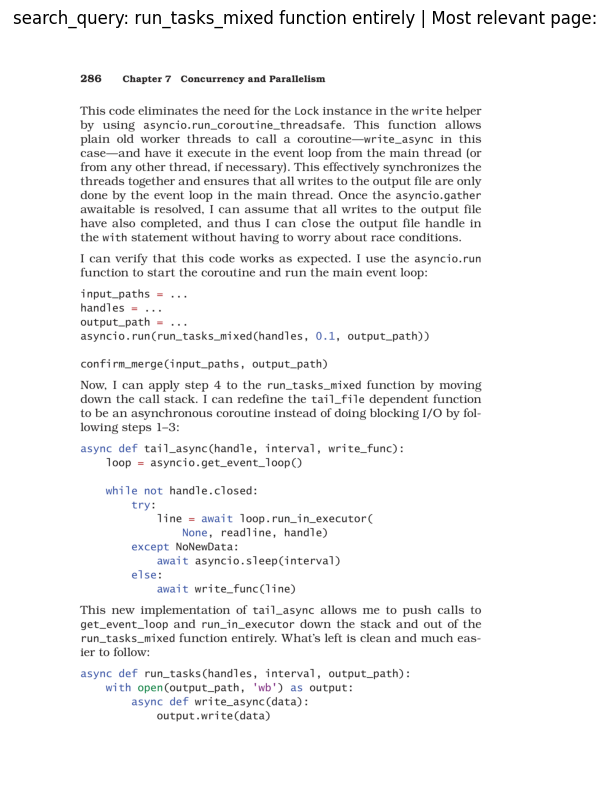

In [103]:
import fitz

# Open the PDF file and Load target
pdf_path = "./pdf_file/Effective-Python.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(295+13) # Note: page number of out PDF starts at 4+

# Get the image of the page
image = page.get_pixmap(dpi=300)

# Save image (optional)
# image.save("output_filename.png")
doc.close()

# Convert the pixmap to a numpy array
img_array = np.frombuffer(image.samples, dtype=np.uint8).reshape(image.height, image.width, image.n)

# Display the image
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"search_query: {search_query} | Most relevant page:")
plt.axis("off")
plt.show()